In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
dataset = pd.read_csv('/Users/tonyjason/Downloads/Egypt_Houses_Price.csv')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB
None


In [112]:
d = dataset.isnull().sum()
d

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

We notice that there are few null values in the dataset. We'll remove the rows with null values as the count of null values is less

In [113]:
dataset.dropna(axis=0,inplace = True)

In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26730 entries, 0 to 27359
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            26730 non-null  object
 1   Price           26730 non-null  object
 2   Bedrooms        26730 non-null  object
 3   Bathrooms       26730 non-null  object
 4   Area            26730 non-null  object
 5   Furnished       26730 non-null  object
 6   Level           26730 non-null  object
 7   Compound        26730 non-null  object
 8   Payment_Option  26730 non-null  object
 9   Delivery_Date   26730 non-null  object
 10  Delivery_Term   26730 non-null  object
 11  City            26730 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


In [115]:
dataset.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [120]:
dataset['Payment_Option'].unique()

array(['Cash', 'Cash or Installment', 'Unknown Payment', 'Installment'],
      dtype=object)

In [95]:
category = ['Type','Furnished','Compound','Payment_Option','Delivery_Date','Delivery_Term','City','Level']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for each in category:
    dataset[each] = label_encoder.fit_transform(dataset[each])
dataset.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,2,4000000,3.0,3.0,400.0,0,8,525,0,6,1,116
1,0,4000000,3.0,3.0,160.0,0,2,525,0,6,1,42
2,0,2250000,3.0,2.0,165.0,0,0,525,0,6,1,165
3,0,1900000,3.0,2.0,230.0,0,1,525,0,6,1,116
4,0,5800000,2.0,3.0,160.0,0,11,139,0,6,3,118


In [96]:
for column in dataset:
    mode = dataset[column].mode()[0]
    dataset[column].replace(to_replace = 'Unknown',value = mode,inplace = True)
    dataset[column].replace(to_replace = '10+',value = mode,inplace = True)

<AxesSubplot:>

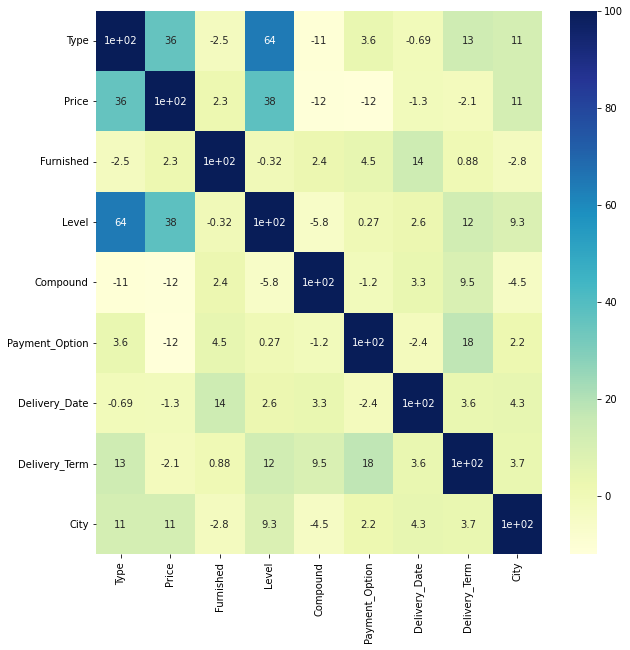

In [97]:
dataset['Price'] = dataset['Price'].astype(float)
plt.figure(figsize = (10,10))
sns.heatmap((dataset).corr()*100,annot=True,cmap = 'YlGnBu')

In [98]:
X = dataset.drop('Price',axis=1).values
Y = dataset['Price'].values

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report,mean_absolute_error 
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [101]:
y_pred = regressor.predict(X_test)

In [102]:
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, y_pred))
print("Training Data score:",regressor.score(X_train,Y_train))
print("Testing data score:",regressor.score(X_test,Y_test))

Coefficients: [  72326.49921168 -618274.14046481 1186806.28332419   17642.43492648
  366663.58248487   42239.28608845   -1519.73900457 -204628.0686013
  -51378.65333391 -409195.99208487    4575.03826975]
Intercept: -226257.96335578337
Mean squared error (MSE): 22644661549765.07
Coefficient of determination (R^2): 0.42
Training Data score: 0.49221298379242184
Testing data score: 0.4197405213460137


In [49]:
X

array([[2, '3.0', '3.0', ..., 6, 1, 116],
       [0, '3.0', '3.0', ..., 6, 1, 42],
       [0, '3.0', '2.0', ..., 6, 1, 165],
       ...,
       [7, '4.0', '3.0', ..., 7, 1, 118],
       [8, '3.0', '4.0', ..., 6, 3, 118],
       [4, '4.0', '4.0', ..., 7, 1, 112]], dtype=object)

In [103]:
X1 = dataset.drop(['Bedrooms','Compound','Payment_Option','Delivery_Date','Delivery_Term','Price'],axis=1).values
Y1 = dataset['Price'].values
X1

array([[2, '3.0', '400.0', 0, 8, 116],
       [0, '3.0', '160.0', 0, 2, 42],
       [0, '2.0', '165.0', 0, 0, 165],
       ...,
       [7, '3.0', '218.0', 1, 13, 118],
       [8, '4.0', '308.0', 0, 13, 118],
       [4, '4.0', '478.0', 1, 13, 112]], dtype=object)

In [104]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report,mean_absolute_error 
regressor = LinearRegression()
regressor.fit(X1_train, Y1_train)

LinearRegression()

In [106]:
y1_pred = regressor.predict(X1_test)

In [108]:
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y1_test, y1_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y1_test, y1_pred))
print("Training Data score:",regressor.score(X1_train,Y1_train))
print("Testing data score:",regressor.score(X1_test,Y1_test))

Coefficients: [ 61550.88086808 853222.51851794  16592.43942978 342788.84277084
  29112.92948638   4264.06826714]
Intercept: -2765868.415543141
Mean squared error (MSE): 23166960581993.93
Coefficient of determination (R^2): 0.41
Training Data score: 0.47084681376282966
Testing data score: 0.40635683868524375


In [3]:
dataset = pd.read_csv('/Users/tonyjason/Downloads/BostonHousing.csv')
X = dataset.drop(['medv'],axis=1)
Y = dataset.medv
Y
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[: , 3] = labelencoder.fit_transform(X[ : , 3])
###onehotencoder = OneHotEncoder(categorical_features = [3])
###X = onehotencoder.fit_transform(X).toarray()

ct = ColumnTransformer([("Country", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)

InvalidIndexError: (slice(None, None, None), 3)

In [9]:
ct = ColumnTransformer([("Country", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [39]:
X = X[: , 1:]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [14]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
220,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307,17.4,391.70,9.71
71,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88
240,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score , classification_report,mean_absolute_error 
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(X_test)

In [22]:
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, y_pred))
print("Training Data score:",regressor.score(X_train,Y_train))
print("Testing data score:",regressor.score(X_test,Y_test))

Coefficients: [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]
Intercept: 38.091694926302004
Mean squared error (MSE): 33.45
Coefficient of determination (R^2): 0.59


In [23]:
#plt.scatter(X_train , Y_train, color = 'red')
#plt.plot(X_train , regressor.predict(X_train), color ='blue')